# Preprocessing: Water treatment plants

**Objective**: Prepare data from the **MERKUR** dataset for use in machine learning algorithms.

**Background**: The MERKUR project, based in the *Research Centre for Built Environment, Climate, Water Technology and Digitalisation* at VIA University College, collects and analyzes data from water treatment plants in Denmark. In short, the project aims to understand how water treatment plants are run, and the results are then ideally used to optimize the running of water treatment plants. However, the dataset is, as of now, relatively "dirty" in a machine learning context: There are many missing values, outliers, a mix of categorical and numeric data, etc.

**Data Source**: The dataset has kindly been provided to us by Senior Associate Professor Loren Mark Ramsay. You can read more [here](https://en.via.dk/research/built-environment-climate-water-technology-and-digitalisation/water-treatment-and-distribution) and [here](https://www.ucviden.dk/en/projects/merkur-national-web-baseret-dataplatform-til-drikkevandsbehandlin).

Note that we are only working with a subset of the full database. This subset is saved as an Excel file, `merkur.xlsx`.

#### Overall Instructions
1. Explore the dataset to understand the features and their distributions.
2. Preprocess the data, handling any missing values, outliers, etc.

Below some suggestions are given but the assignment is relatively "free".

Best of luck with your analysis!

### Suggestions

-  Filter out (i.e. remove) any irrelevant columns (e.g. names, IDs, etc.)
-  Several columns contain missing values (NaNs). Find out how large a percentage each column is missing. Perhaps some of them lack so much data that you should consider removing them?
-  Scale numeric data.
-  For the features you choose to keep, impute the missing values in an appropriate way - or perhaps you find it more appropriate to delete the rows?
-  Several features (e.g., "PrimaryTrigger") are categorical. Use one-hot encoding to turn them into numeric data. Be careful with the feature "Stages" - perhaps one-hot encoding is not the best choice here?
-  If you choose to remove or replace outliers, do this now. If you choose to keep, move on.
-  Create a correlation matrix and discuss - based on this, you might want to drop certain columns.
-  Consider whether some features should be transformed (e.g. using log, square root etc.) and do this if found relevant.
-  There are only about 80 rows in the data set. Discuss consequences of this in terms of machine learning - as well as potential solutions. 
-  Think about whether there are other steps you find appropriate at this point. If not, declare your data set clean.

1. **TotalFilters**: The total number of filters in the system, which determines redundancy and capacity. More filters mean better reliability and distribution of load.

2. **MaxTypicalFlow**: The maximum flow rate the system is designed to handle under typical conditions. This value is crucial for ensuring that water flows through the system without overwhelming the filters.

3. **AverageFilterArea**: The surface area of each filter, impacting filtration efficiency. A larger filter area allows more water to be processed simultaneously, reducing clogging and extending filter life.

4. **AverageTypicalRunVolume**: The typical volume of water that each filter processes before it requires backwashing or cleaning. It indicates filter longevity and how well the filter holds up under normal loads.

5. **AverageBackwashVolume**: The volume of water used to backwash (clean) a filter. Efficient backwashing ensures that filters are clean without wasting excessive water.

6. **PrimaryTrigger**: Likely a control or mechanism that triggers primary processes or phases in treatment, such as switching filters or initiating backwash. 

7. **AverageTotalFilterDepth**: The depth of the filter media, which influences how well the filter can capture particles. Deeper filters can handle smaller particles and contaminants more effectively.

8. **OverallFilterGrainSizeMin** and **OverallFilterGrainSizeMax**: The smallest and largest grain sizes within the filter media. Smaller grains capture finer particles, while larger grains provide faster water flow.

9. **AverageFilterBedVolume**: The volume of the filter bed (where the filtration media is held), which impacts the capacity and efficiency of the filtration process.

10. **FilterExploitation**: Likely refers to the utilization level of each filter, indicating how hard each filter is being worked. High exploitation can lead to faster wear.

11. **AerationType**: The type of aeration system used. Aeration introduces oxygen into the water, which is essential for oxidizing certain contaminants and supporting biological treatment processes.

12. **OxygenFactor**: Measures the oxygen input relative to water flow, important in ensuring enough oxygen for oxidation or biological treatment.

13. **Stage1HLR**: Hydraulic Loading Rate (HLR) in the first stage, which is the rate at which water flows through the system. Proper HLR is essential to prevent overflow and maintain optimal contact time for treatment.

14. **TotalEBCT**: Empty Bed Contact Time, which measures the time water spends in contact with the filter media. Higher EBCT usually allows more thorough contaminant removal, especially in adsorption or biological filtration.

15. **Footprint**: The physical area required by the treatment setup, important for understanding space efficiency.

16. **SumOfld_layer**: Possibly refers to the sum of loading per layer, which could indicate how much material each layer of a filter bed holds, important in assessing filtration efficiency and balance.

17. **UniformityCoefficient**: Measures the consistency in grain size of filter media. A lower uniformity coefficient means the grains are more consistent in size, generally leading to more efficient filtration.

18. **UFRV**: Unit Filter Run Volume, indicating the volume of water processed per filter run before backwashing. It’s a measure of filter efficiency and helps determine optimal cleaning schedules.

19. **BW%**: Backwash percentage, which might represent the proportion of water used for backwashing relative to the total filtered water. Lower values are more efficient, as they minimize water waste.

20. **HLR_BW**: Hydraulic Loading Rate during backwashing. This rate should be high enough to clean the filter effectively but not so high that it damages the filter media.

21. **TankCapacity**: The volume capacity of storage or treatment tanks. This value helps in designing holding and processing stages, especially for peak loads or emergencies.

22. **TankExploitation**: The utilization rate of the tank, which indicates how fully the tank is used. High exploitation may lead to faster wear or insufficient buffer for peak loads.

23. **GravityPressureMixed**: Likely refers to whether the system uses gravity flow, pressure-driven flow, or a combination, which affects water flow rates and energy efficiency.

24. **Stages**: The number of treatment stages, where each stage might perform a different function (e.g., sedimentation, filtration, disinfection), affecting the overall quality of treated water.

25. **AbstractedVolume**: The volume of water sourced for treatment. Knowing the intake volume is essential for tracking source water quality and managing treatment load.

In [256]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, RobustScaler

In [257]:
# Defining helper function for analysis

def box_plots(df, cols):
    plt.figure(figsize=(20, 20))
    for i, col in enumerate(cols):
        plt.subplot(5, 4, i + 1)
        sns.boxplot(y=df[col])
        plt.title(col)
        plt.tight_layout()
    plt.show()

def hist_plots(df, cols):
    plt.figure(figsize=(20, 20))
    for i, col in enumerate(cols):
        plt.subplot(5, 4, i + 1)
        sns.histplot(df[col], kde=True)
        plt.xlabel(col)
        plt.title(col)
        plt.grid(True)
        plt.tight_layout()
    plt.show()

In [258]:
df = pd.read_excel(r"merkur.xlsx")

In [259]:
display(df.head(15))

,WaterworksName,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,PrimaryTrigger,AverageTotalFilterDepth,OverallFilterGrainSizeMin,OverallFilterGrainSizeMax,...,SumOfld_layer,UniformityCoefficient,UFRV,BW%,HLR_BW,TankCapacity,TankExploitation,GravityPressureMixed,Stages,AbstractedVolume
0,Asnæs Vandværk,6,50.00,6.000000,5200.000000,10.0,Time,NaN,NaN,NaN,...,NaN,NaN,866.666667,0.414525,NaN,27.294778,NaN,Gravity,Single,253543
1,Assens Vandværk,4,110.00,4.908739,300.000000,28.0,Volume,310.000000,0.8,5.0,...,2891.666665,NaN,40.743665,23.000062,30.557749,2.576075,NaN,Pressure,Double,612094
2,Astrup Vandværk - Esbjerg,4,120.00,15.343900,3800.000000,83.3,Volume,190.000000,2.0,35.0,...,759.000000,1.491,249.217919,2.192086,32.791831,21.825600,NaN,Gravity,Double,682318
3,Astrup Vandværk - Skjern,2,NaN,16.000000,1200.000000,26.0,Volume,NaN,NaN,NaN,...,NaN,NaN,75.000000,2.166907,NaN,12.554300,NaN,Gravity,Single,156998
4,Avernakø Vandværk,2,NaN,1.495000,250.000000,4.5,Volume,NaN,1.6,32.0,...,NaN,NaN,167.224093,1.818182,NaN,52.220566,NaN,Gravity,Single,6710
5,Bagterp Vandværk,12,215.00,14.299999,2833.333333,30.0,Volume,NaN,NaN,NaN,...,NaN,2.273,148.601406,1.411789,17.482518,26.506498,10.285714,Gravity,Double,1321940
6,Benløse Rundings Vandværk,5,51.00,4.000000,870.000000,10.5,Volume,NaN,NaN,NaN,...,NaN,NaN,87.500000,4.050212,NaN,4.835745,35.714286,Gravity,Double,181151
7,Billund Vandværk,7,112.17,6.610000,3342.857143,23.0,Volume,159.285714,0.8,5.0,...,102.083332,NaN,302.571861,1.517347,30.257186,16.612073,24.046921,Pressure,Mixed,761988
8,Birkerød Vandforsyning,12,211.00,13.316667,22000.000000,19.0,Volume,100.000000,0.8,35.0,...,475.388889,NaN,888.888889,1.306269,25.225224,7.104312,17.209302,Gravity,Double,1233054
9,Boulstrup vandværk,2,118.10,10.178760,5499.500000,NaN,Volume,300.000000,1.6,8.0,...,1400.833297,NaN,392.876945,NaN,39.297519,19.231666,44.014085,Pressure,Double,364399


First we analyse the data and see how and which features could be imputed and which should be dropped based on the amount of NaN values.

For analysis we will keep 'index' column

In [260]:
df.reset_index(inplace=True)

# Encoding categorical values
'PrimaryTrigger' 'GravityPressureMixed' 'AerationType' seem to be Nominal categories so they will be encoded with OneHotEncoding.

 'Stages' seems to be Ordinal category so it will be encoded with LabelEncoder.

In [261]:
# First label encoding the categorical columns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# OneHotEncoding for PrimaryTrigger
trigger_encoder = OneHotEncoder(sparse_output=False, drop='first')
primary_trigger_encoded = trigger_encoder.fit_transform(df[['PrimaryTrigger']])
primary_trigger_encoded_df = pd.DataFrame(primary_trigger_encoded, columns=trigger_encoder.get_feature_names_out(['PrimaryTrigger']))

# OneHotEncoding for GravityPressureMixed
gravity_pressure_encoder = OneHotEncoder(sparse_output=False, drop='first')
gravity_pressure_encoded = gravity_pressure_encoder.fit_transform(df[['GravityPressureMixed']])
gravity_pressure_encoded_df = pd.DataFrame(gravity_pressure_encoded, columns=gravity_pressure_encoder.get_feature_names_out(['GravityPressureMixed']))

# OneHotEncoding for AerationType
aeration_type_encoder = OneHotEncoder(sparse_output=False, drop='first')
aeration_type_encoded = aeration_type_encoder.fit_transform(df[['AerationType']])
aeration_type_encoded_df = pd.DataFrame(aeration_type_encoded, columns=aeration_type_encoder.get_feature_names_out(['AerationType']))

# Concatenate the OneHotEncoded columns with the original dataframe
df = pd.concat([df.drop(columns=['PrimaryTrigger', 'GravityPressureMixed', 'AerationType']), 
                primary_trigger_encoded_df, gravity_pressure_encoded_df, aeration_type_encoded_df], axis=1)

# Label encoding for other categorical columns
stage_encoder = LabelEncoder()

df['Stages'] = stage_encoder.fit_transform(df['Stages'])

In [262]:
# Dropping unnecessary column
df = df.drop(columns=['WaterworksName'])

# Handling null values

In [263]:
# Looking at the percentage of missing values
missing_percentage = (df.isnull().sum() / len(df) * 100).astype(int)
display(missing_percentage[missing_percentage > 0])

MaxTypicalFlow               20
AverageFilterArea             5
AverageTypicalRunVolume       2
AverageBackwashVolume        12
AverageTotalFilterDepth      41
OverallFilterGrainSizeMin    43
OverallFilterGrainSizeMax    43
AverageFilterBedVolume       43
FilterExploitation           20
Stage1HLR                    26
TotalEBCT                    49
Footprint                     5
SumOfld_layer                49
UniformityCoefficient        64
UFRV                          8
BW%                          16
HLR_BW                       34
TankCapacity                  5
TankExploitation             37
dtype: int64

Now we will analyse the data based on if the columns are null or not

In [264]:
columns_with_nulls = [col for col in df.columns if df[col].isnull().sum() > 0]
columns_no_nulls = [col for col in df.columns if df[col].isnull().sum() == 0]
columns_no_nulls.remove('index')

First we looked at columns that have missing percentage less than 15%.

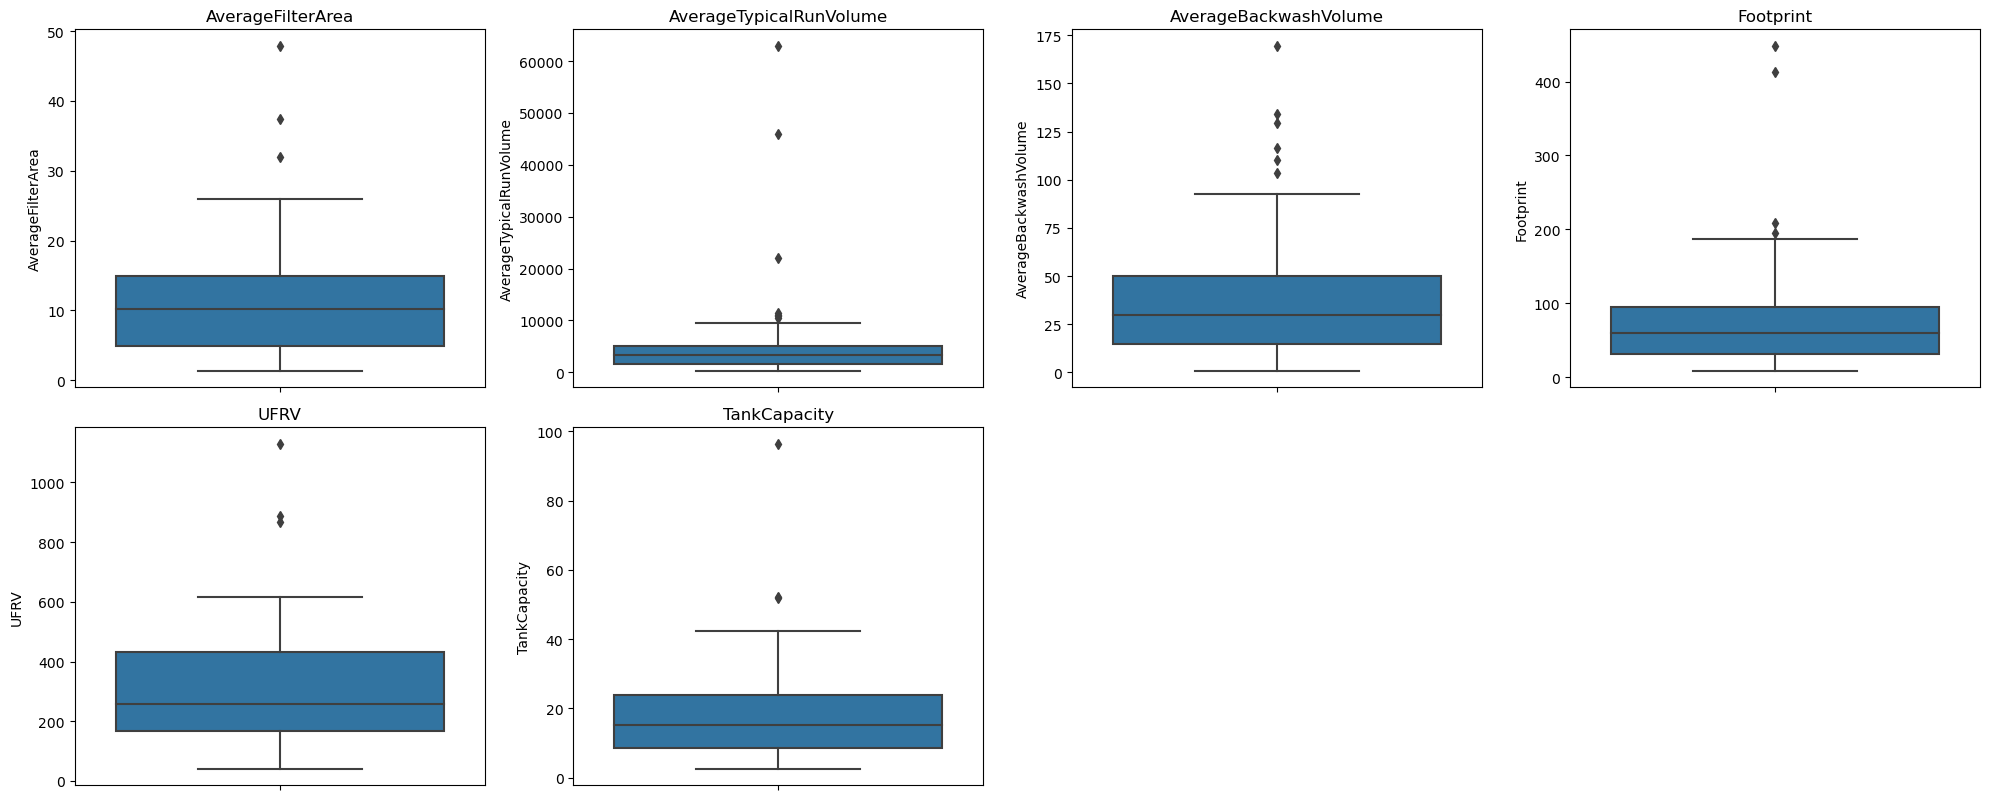

In [265]:
columns_less_than_15 = [col for col in columns_with_nulls if missing_percentage[col] < 15]
box_plots(df, columns_less_than_15)

Looking at features where the NaN percentage is less than 15% most of them are placed closely with few outliers. Based on this we can fill in the low percentage count of NaN values with the mean value from values with z-score of 1.96

In [266]:
# Defining a function to fill the missing values with the mean value in the 95%
def will_nan_with_mean_without_outliers(column):
    df[column].fillna(df[column].dropna()[abs(zscore(df[column].dropna())) <= 1.96].mean(), inplace=True)

In [267]:
for col in columns_with_nulls:
    if missing_percentage[col] < 15:
        print(f'Filling missing values in column: {col}')
        will_nan_with_mean_without_outliers(col)

Filling missing values in column: AverageFilterArea
Filling missing values in column: AverageTypicalRunVolume
Filling missing values in column: AverageBackwashVolume
Filling missing values in column: Footprint
Filling missing values in column: UFRV
Filling missing values in column: TankCapacity


In [268]:
# Looking at the percentage of missing values again
missing_percentage = (df.isnull().sum() / len(df) * 100).astype(int)
display(missing_percentage[missing_percentage > 0])

MaxTypicalFlow               20
AverageTotalFilterDepth      41
OverallFilterGrainSizeMin    43
OverallFilterGrainSizeMax    43
AverageFilterBedVolume       43
FilterExploitation           20
Stage1HLR                    26
TotalEBCT                    49
SumOfld_layer                49
UniformityCoefficient        64
BW%                          16
HLR_BW                       34
TankExploitation             37
dtype: int64

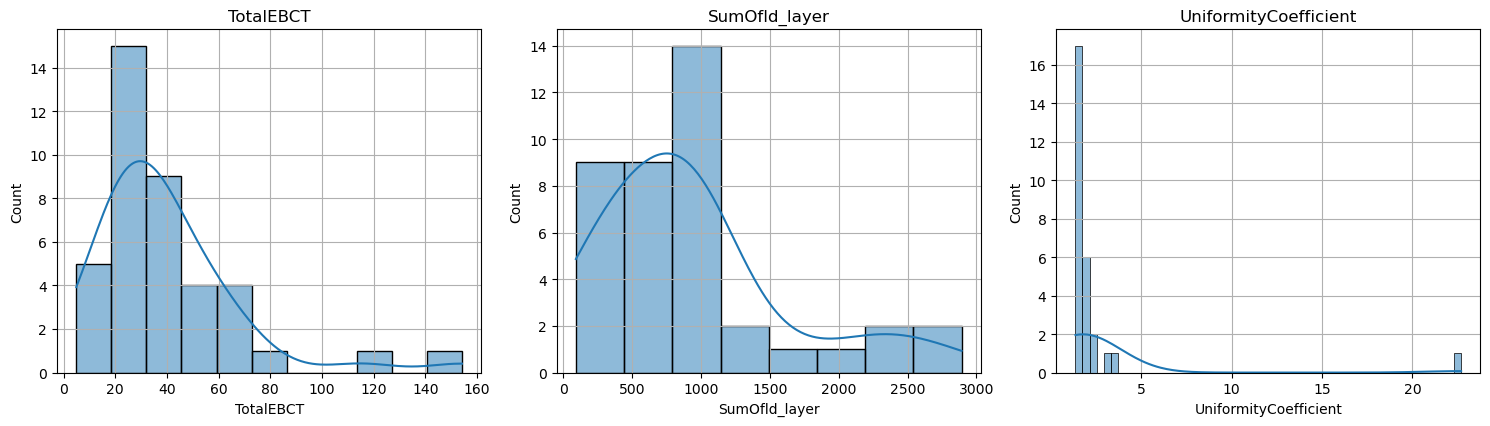

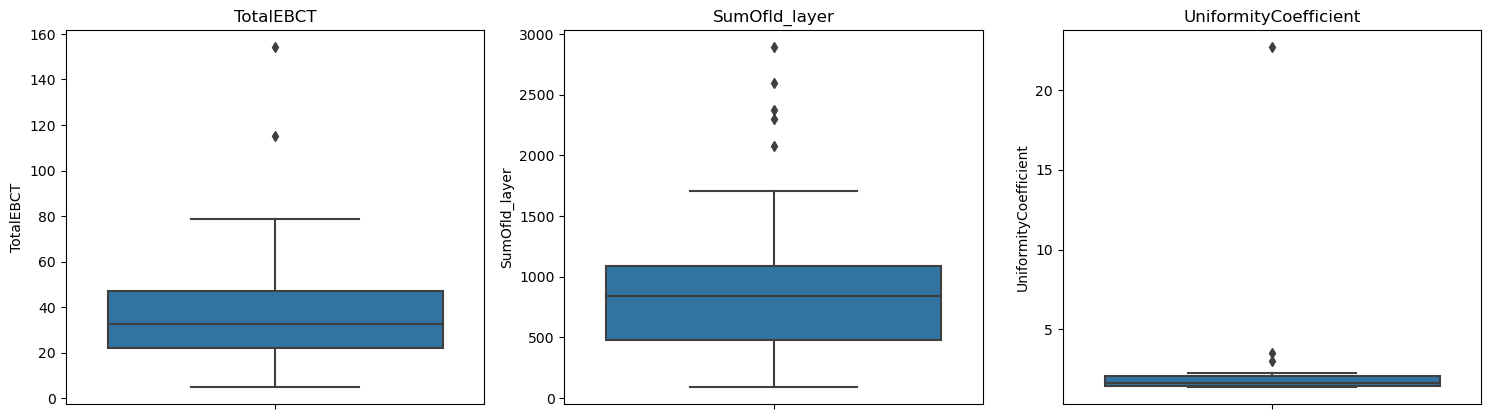

In [269]:
# Now we analyse values that have more than 45% missing values
columns_more_than_45 = [col for col in columns_with_nulls if missing_percentage[col] > 45]
hist_plots(df, columns_more_than_45)
box_plots(df, columns_more_than_45)

Based on these plots we can see that the data is somewhat close but with a large percentage of NaN values, we could create a bias in the data. In Uniformity Coefficient the data is very close together with only few outliers, problem is that the percentage of NaN values is 64% which could create easily bias in the data if the missing values could be with a higher value.

In this case these columns will be dropped to not create possible bias.

In [270]:
df.drop(columns=columns_more_than_45, inplace=True)

In [271]:
# Looking at the percentage of missing values again
missing_percentage = (df.isnull().sum() / len(df) * 100).astype(int)
display(missing_percentage[missing_percentage > 0])

MaxTypicalFlow               20
AverageTotalFilterDepth      41
OverallFilterGrainSizeMin    43
OverallFilterGrainSizeMax    43
AverageFilterBedVolume       43
FilterExploitation           20
Stage1HLR                    26
BW%                          16
HLR_BW                       34
TankExploitation             37
dtype: int64

Looking at rest of the data

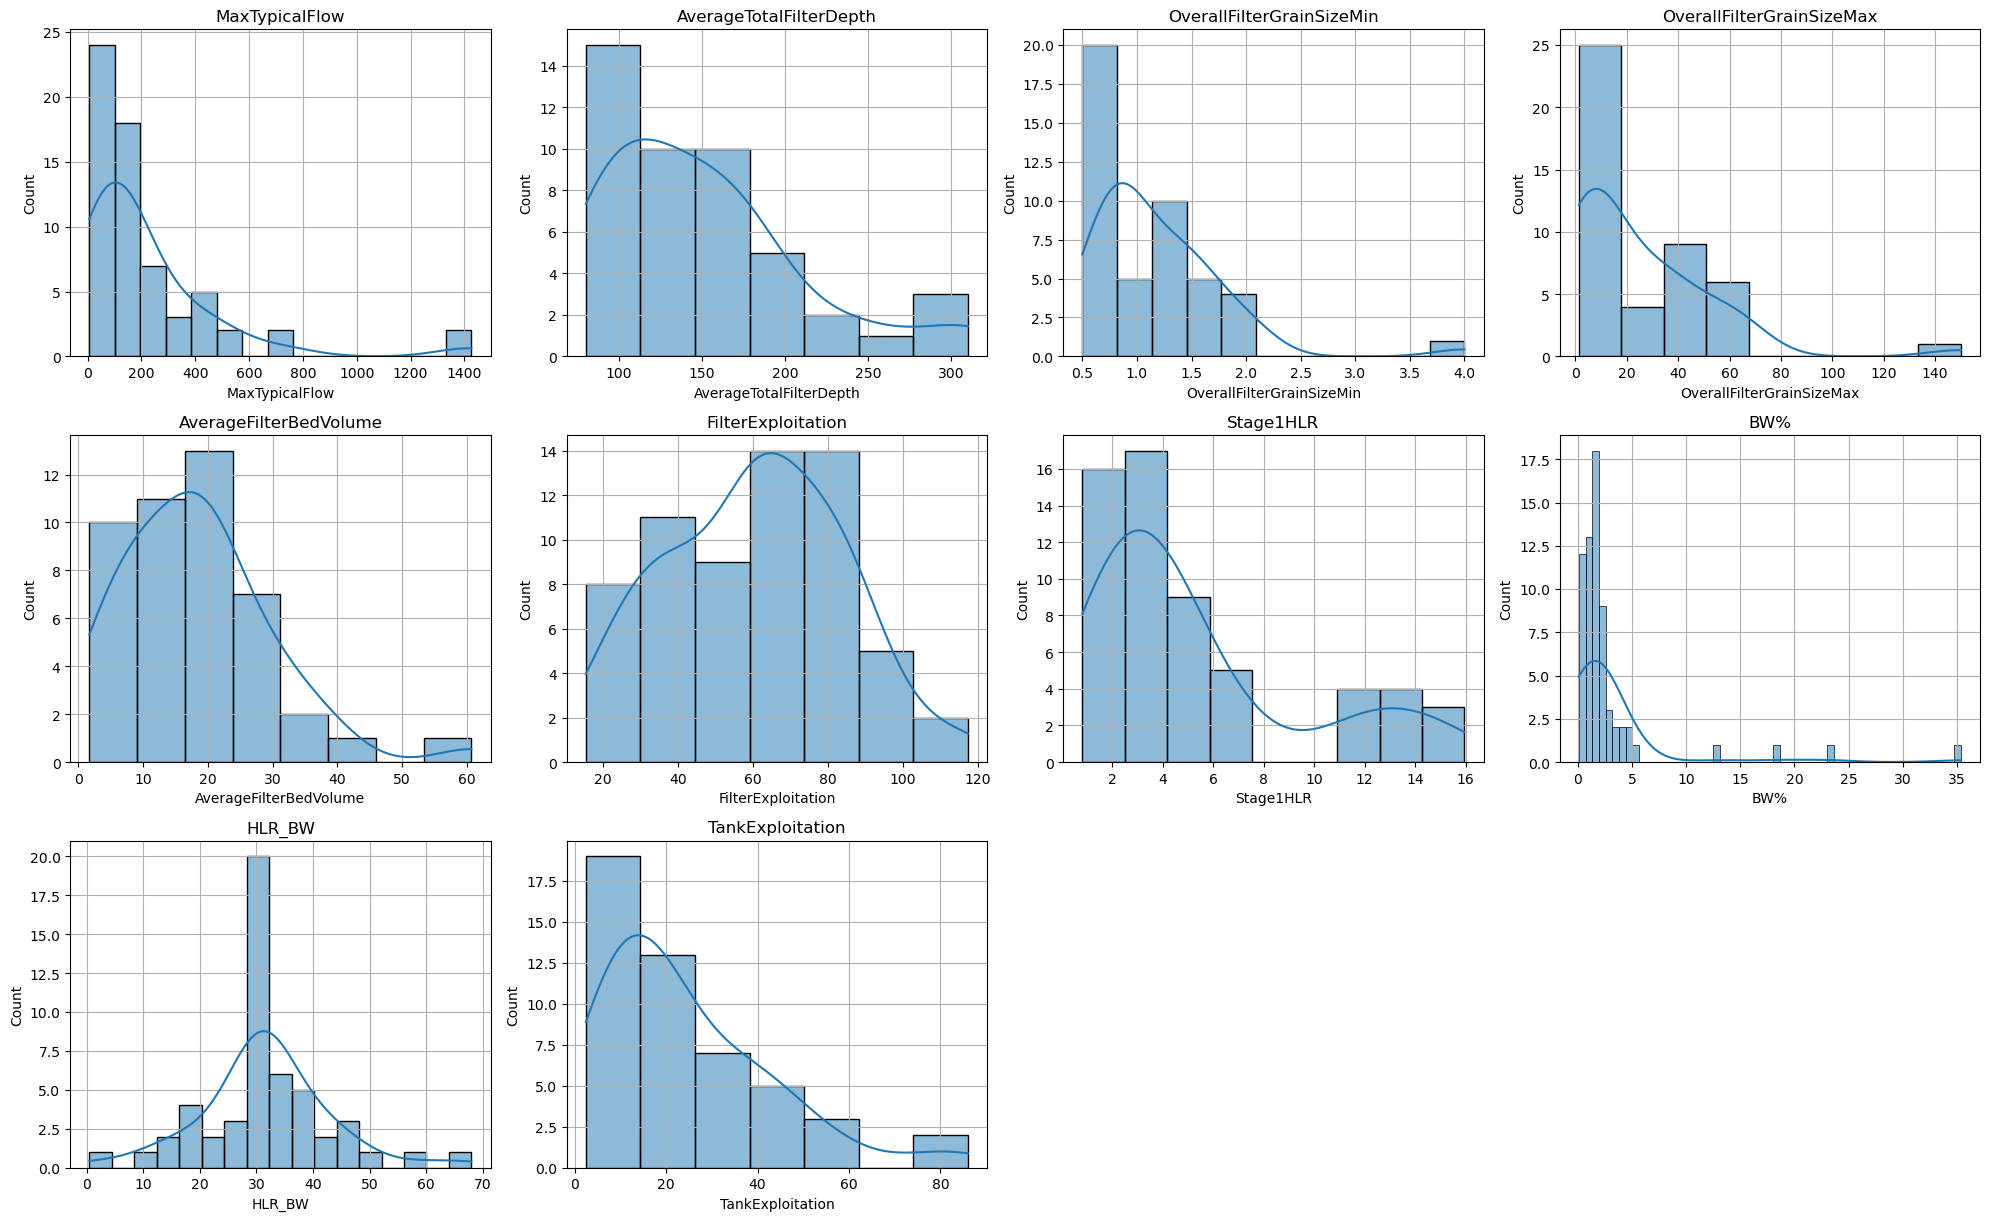

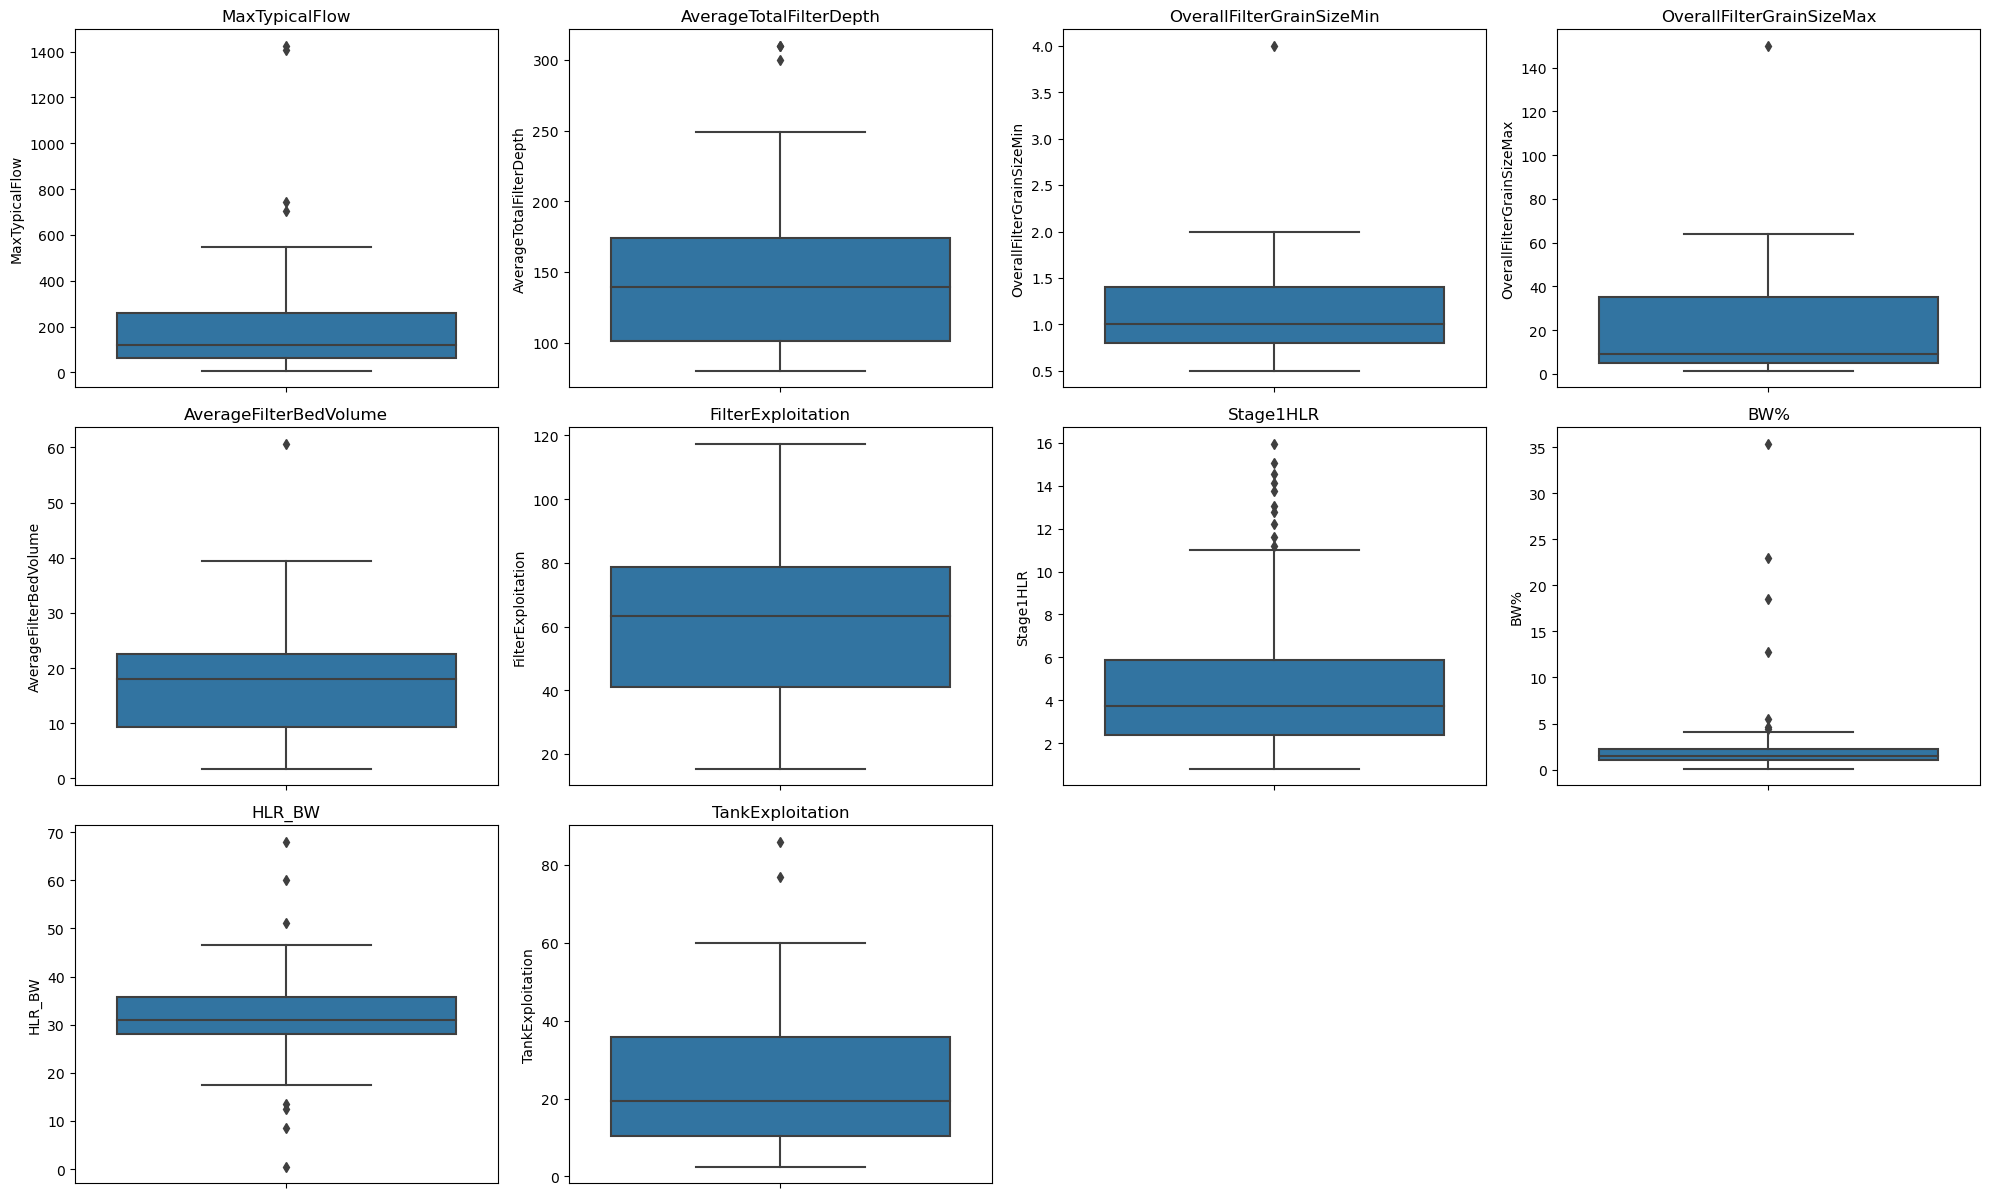

In [272]:
columns_left_with_nan = [col for col in df.columns if df[col].isnull().sum() > 0]
hist_plots(df, columns_left_with_nan)
box_plots(df, columns_left_with_nan)

Based on the data being more right skewed, the NaN values should be filled with the median value rather than mean.

In [273]:
df.fillna(df.median(), inplace=True)

In [274]:
df.drop(columns=['index'], inplace=True)

In [275]:
# Now that we've handled all NaN values, we can change BW% from precentages to decimal values
df['BW'] = df['BW%']/100
df.drop(columns=['BW%'], inplace=True)

# Correlation matrix

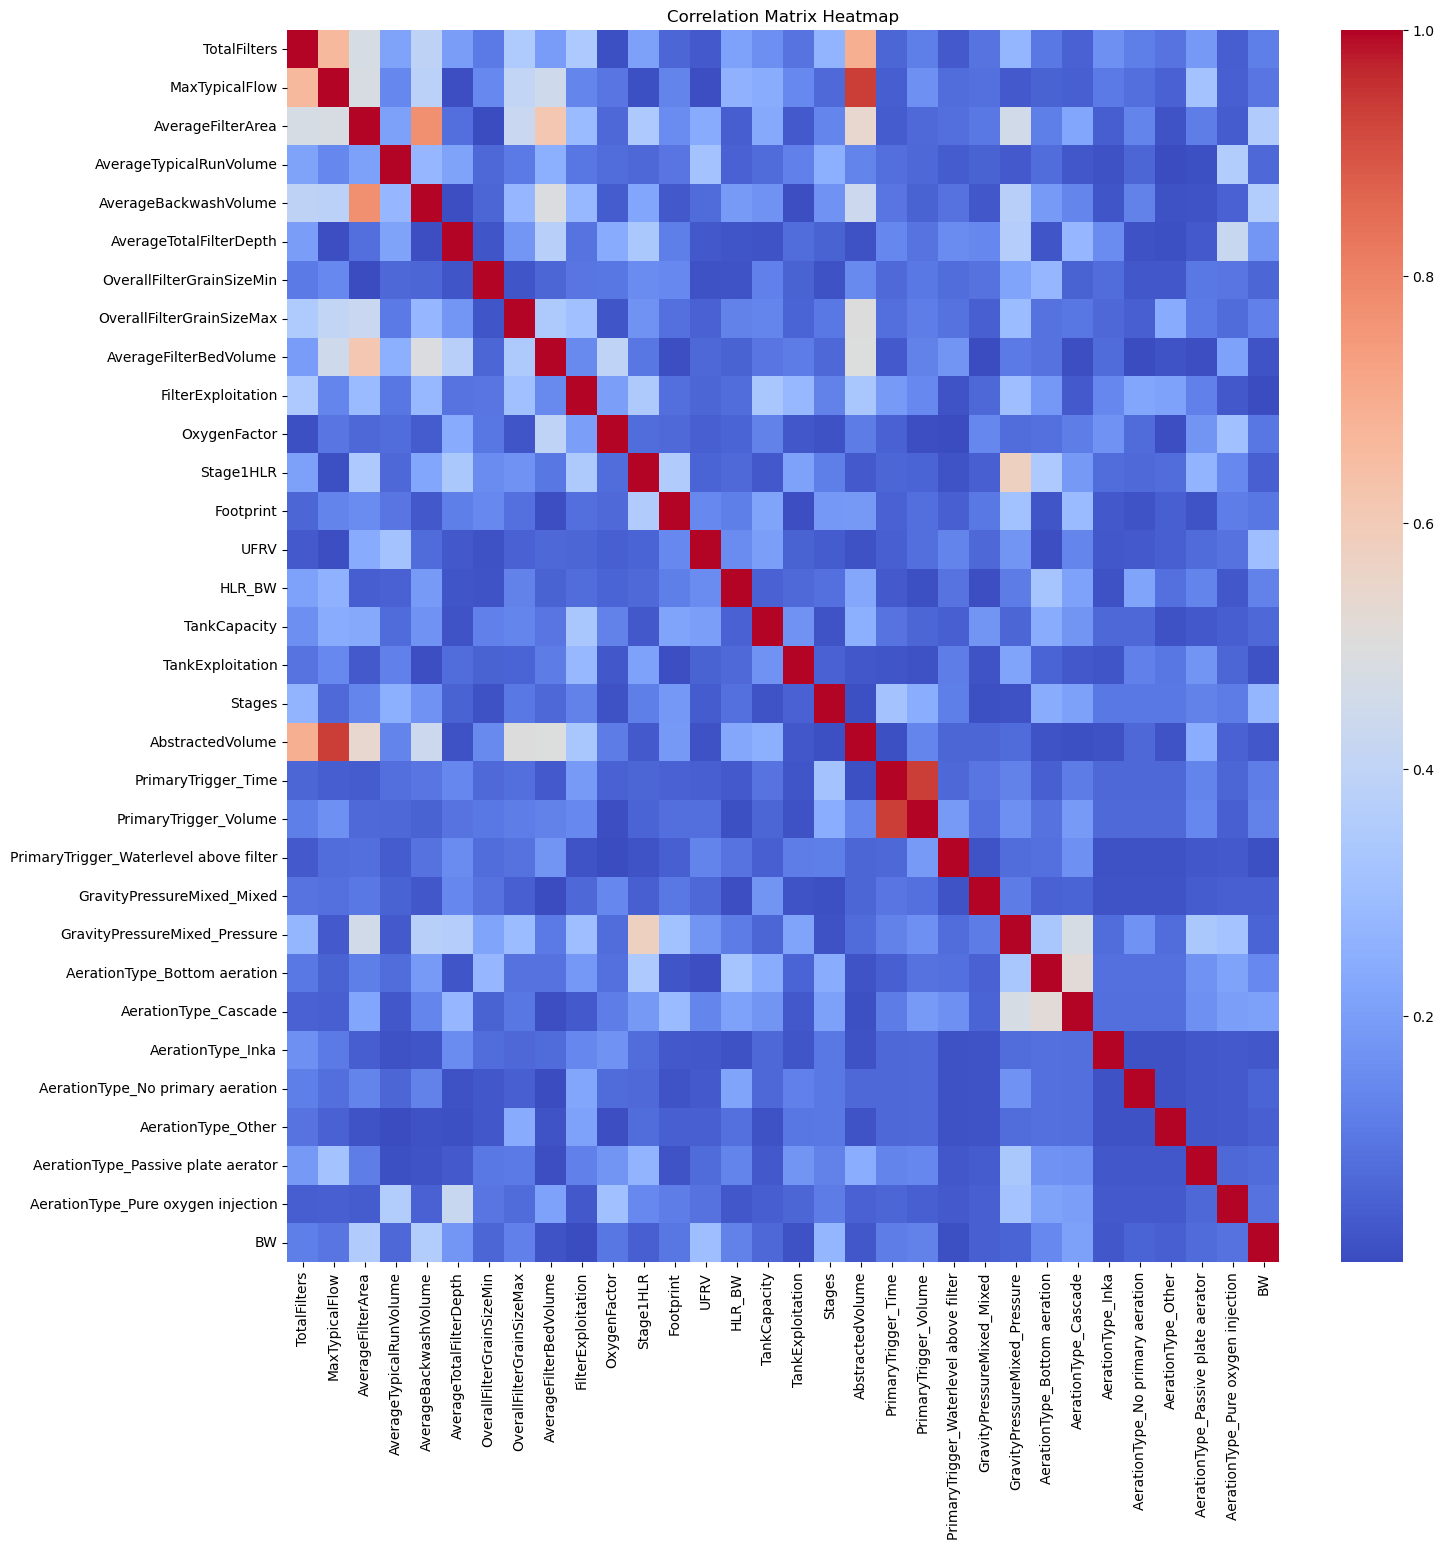

In [276]:
# Using absolute values, as negative correlation also means that the features are correlated
correlation_matrix = df.corr().abs()

plt.figure(figsize=(16, 16))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

It seems like most of these features don't have too large of a correlation between eachother, but there are still some with high correlations. We would want to get rid of unnecessary similar columns if they weren't our target, but since we don't have one we'll keep all the columns.

In [277]:
# Select the upper triangle of the correlation matrix
upper_tri = correlation_matrix.where(~np.tril(np.ones(correlation_matrix.shape)).astype(bool))

# Find columns with a correlation higher than a threshold, e.g., 0.8
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]

# As we can see, there are only two column that have a higher correlation than 80%
# In case none of these columns would be a target, we'd try to reduce the number of features as they tell us the same information
print(to_drop)

['AbstractedVolume', 'PrimaryTrigger_Volume']


# Scaling data

In [307]:
# Removing boolean data from the dataset for scaling
data_for_scaling = df.loc[:, ~df.apply(lambda col: col.isin([0, 1]).all())]
boolean_data = df.loc[:, df.apply(lambda col: col.isin([0, 1]).all())]

In [308]:
# Using standardization, which is good for algorithms that expect data, which is normally distributed around 0

scaler = StandardScaler()

standardized_data = pd.DataFrame(scaler.fit_transform(data_for_scaling), columns=data_for_scaling.columns)

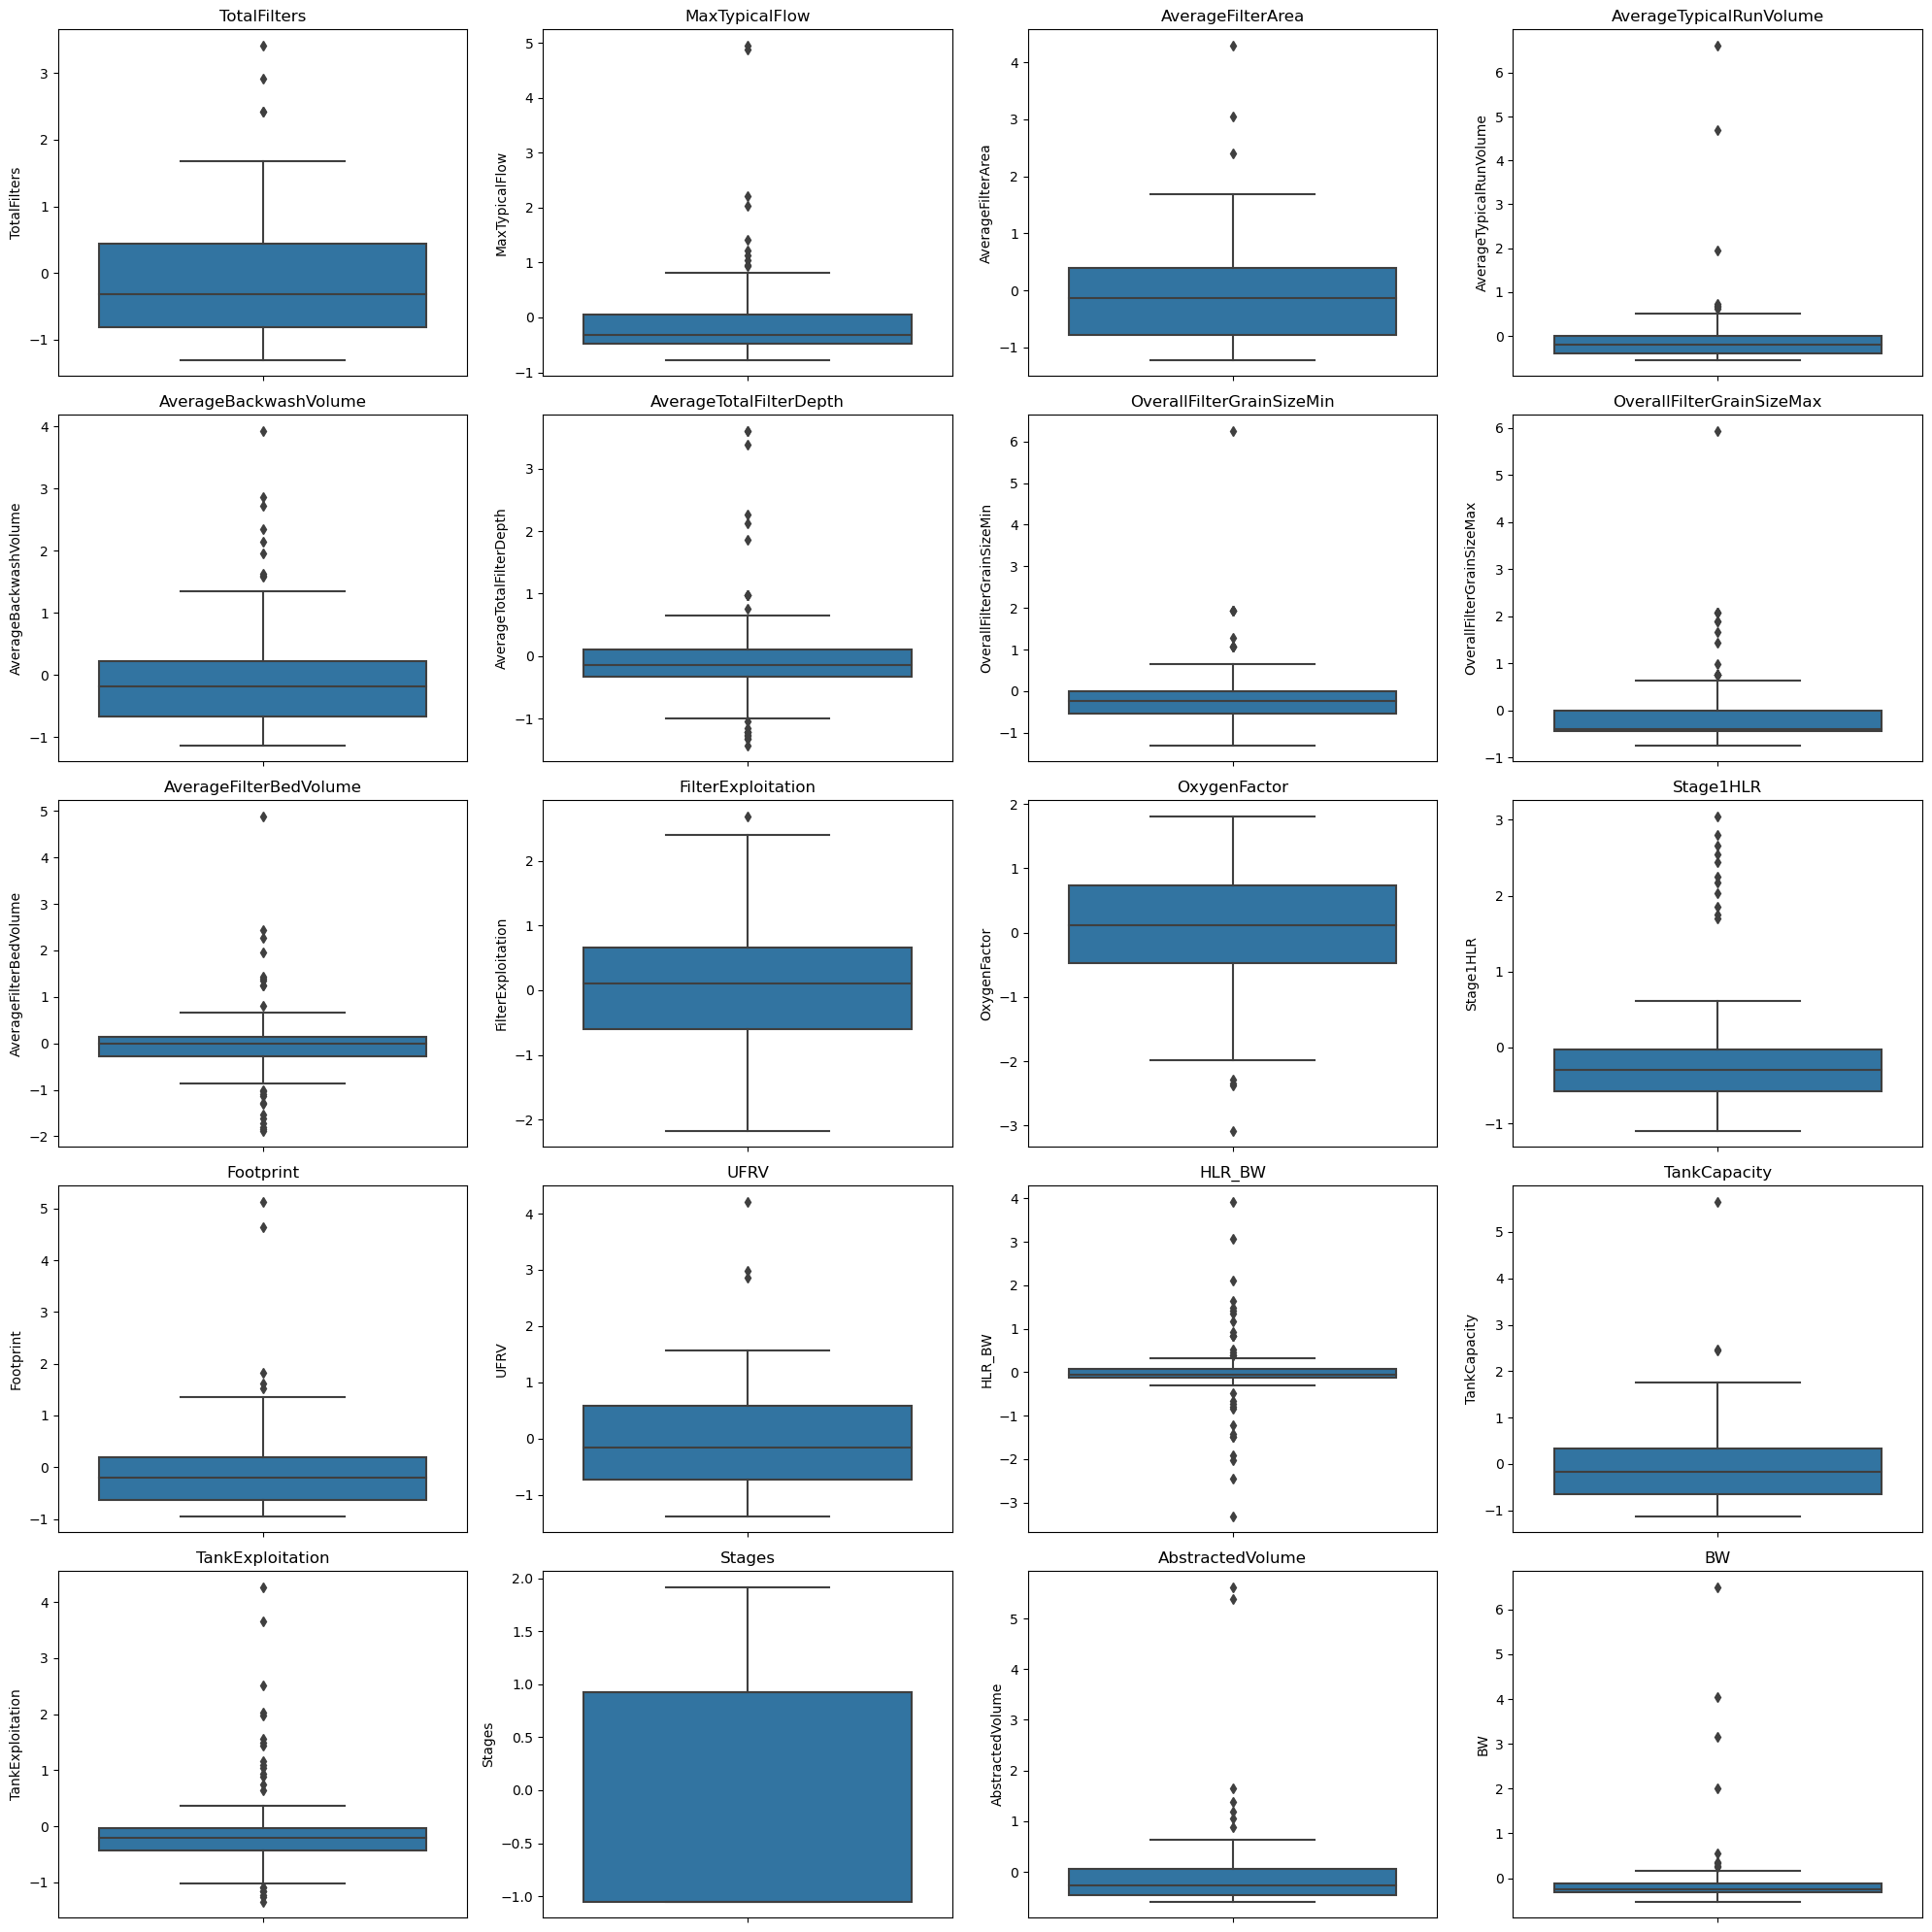

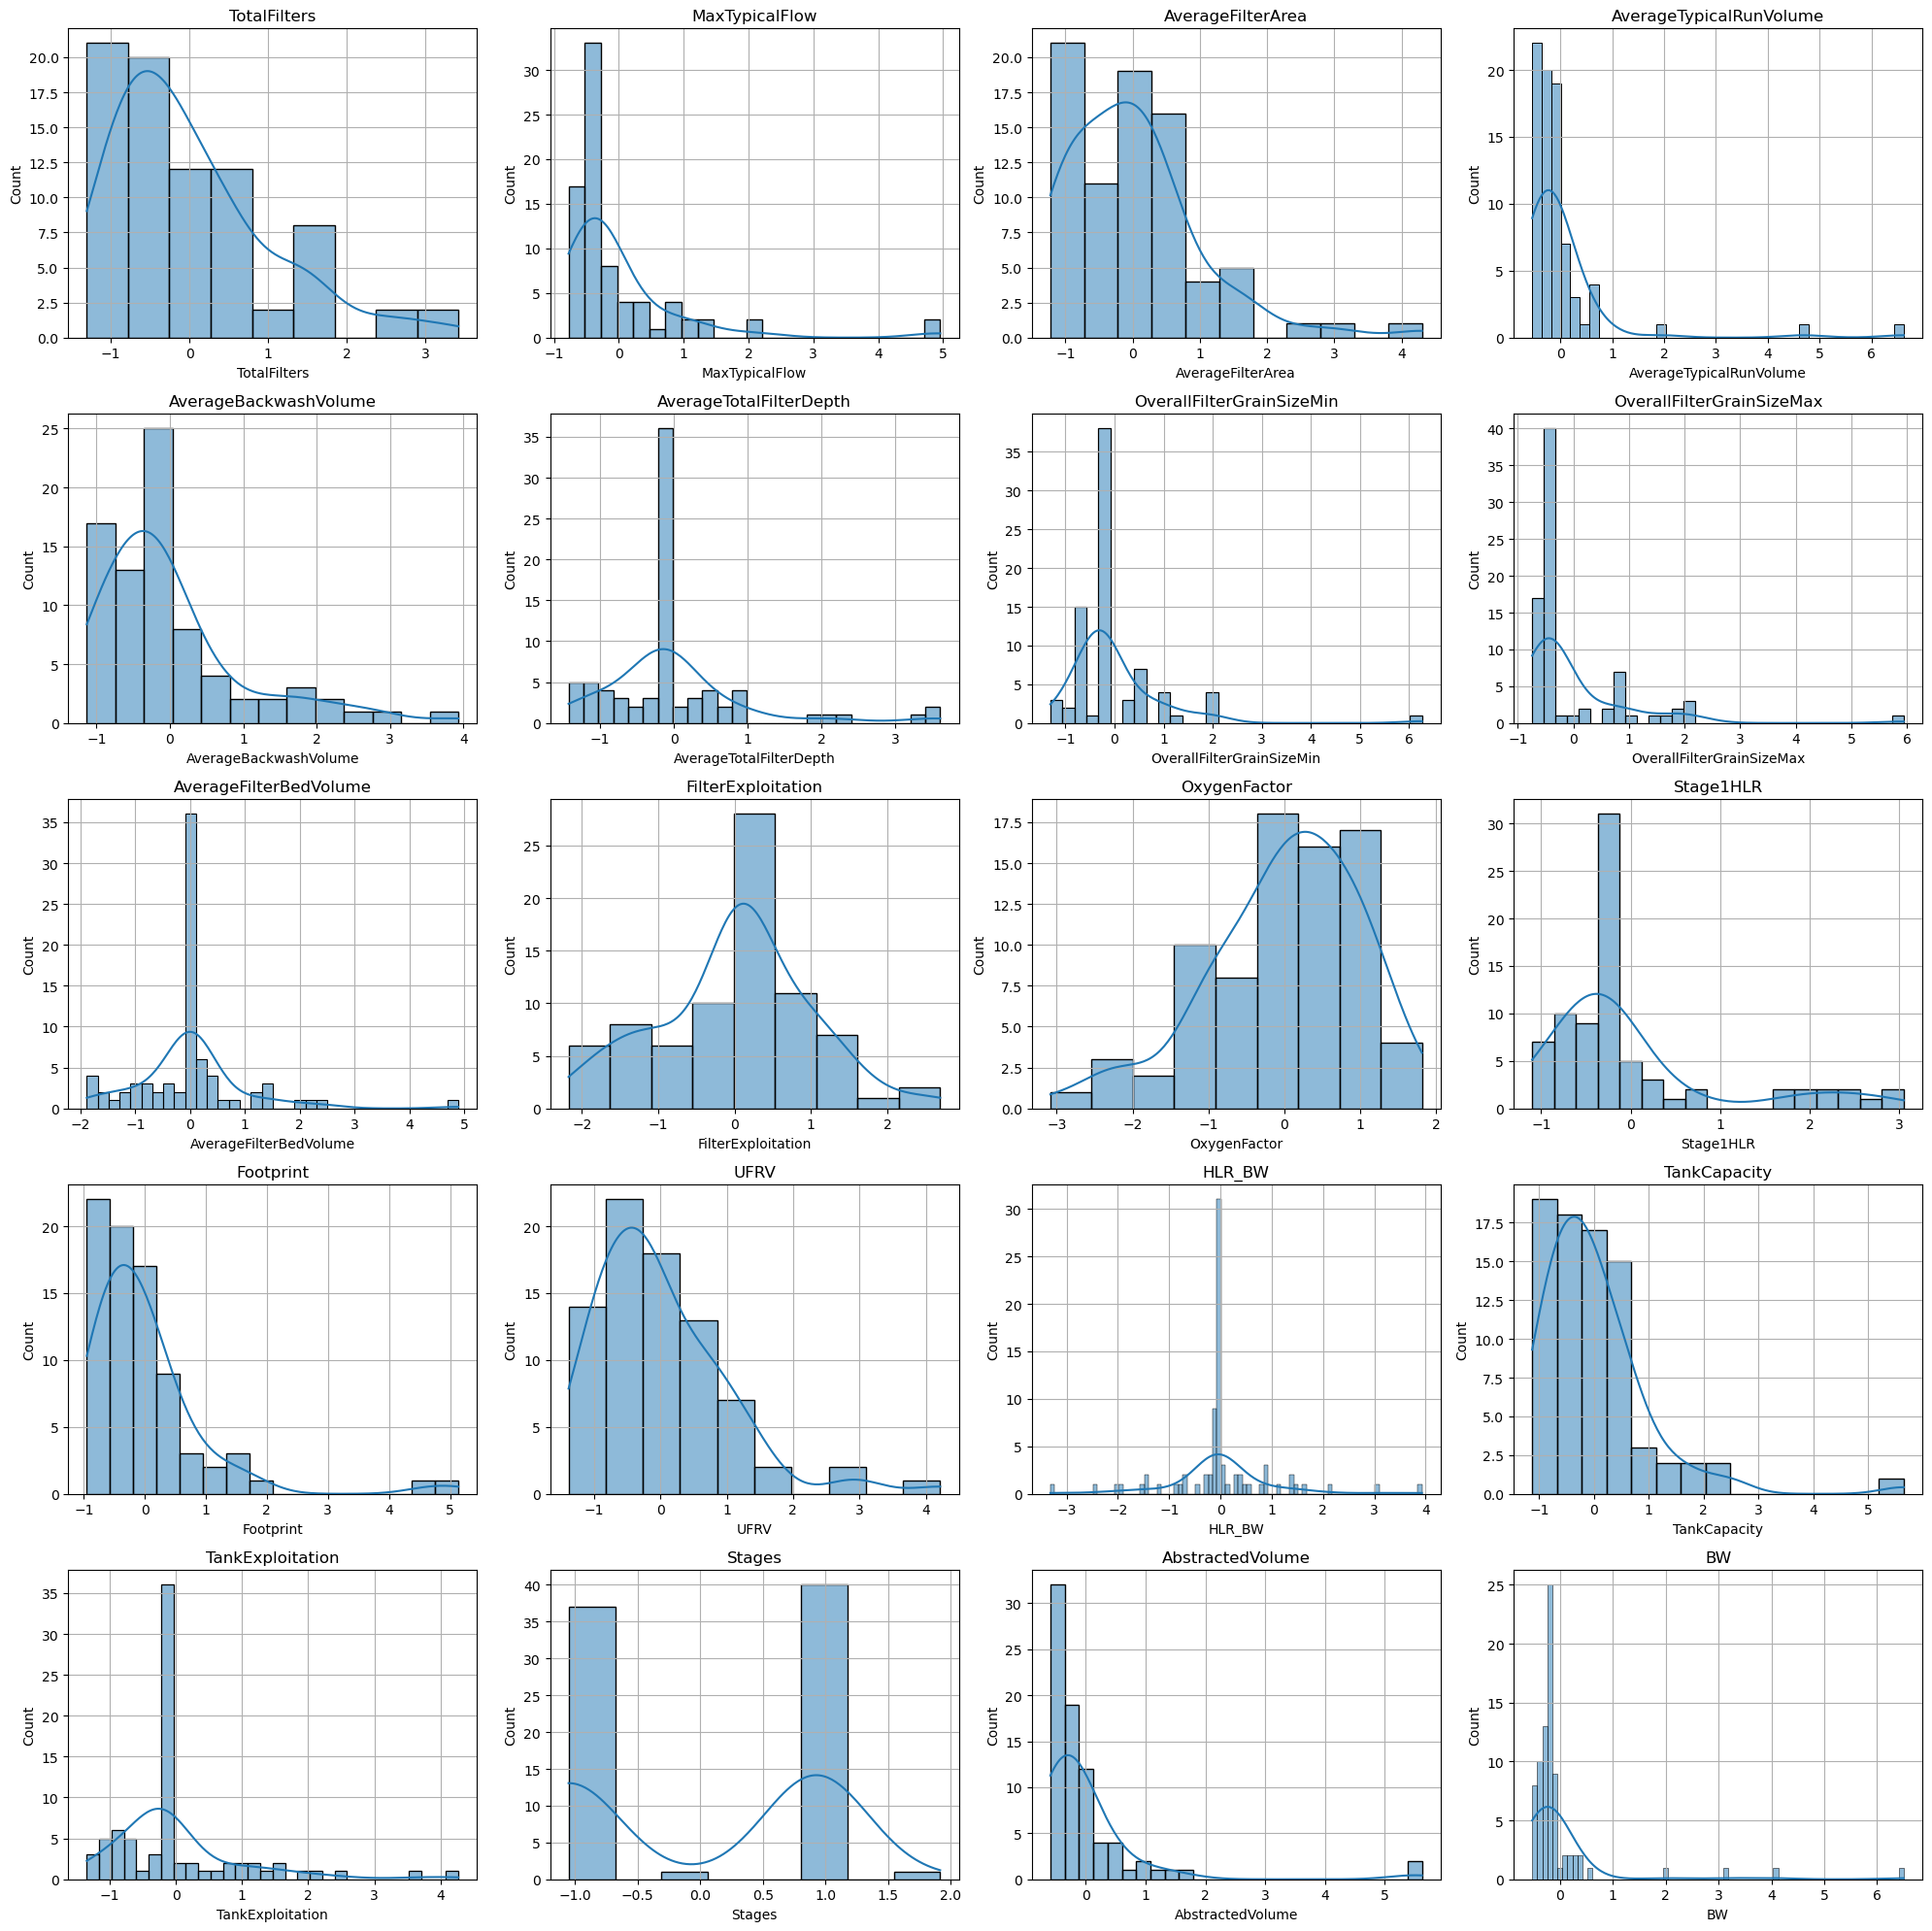

In [309]:
box_plots(standardized_data, standardized_data.columns)
hist_plots(standardized_data, standardized_data.columns)

In [310]:
# Using standardization, which is good for algorithms that expect data, which is normally distributed around 0

scaler = RobustScaler()

robust_scaled_data = pd.DataFrame(scaler.fit_transform(data_for_scaling), columns=data_for_scaling.columns)

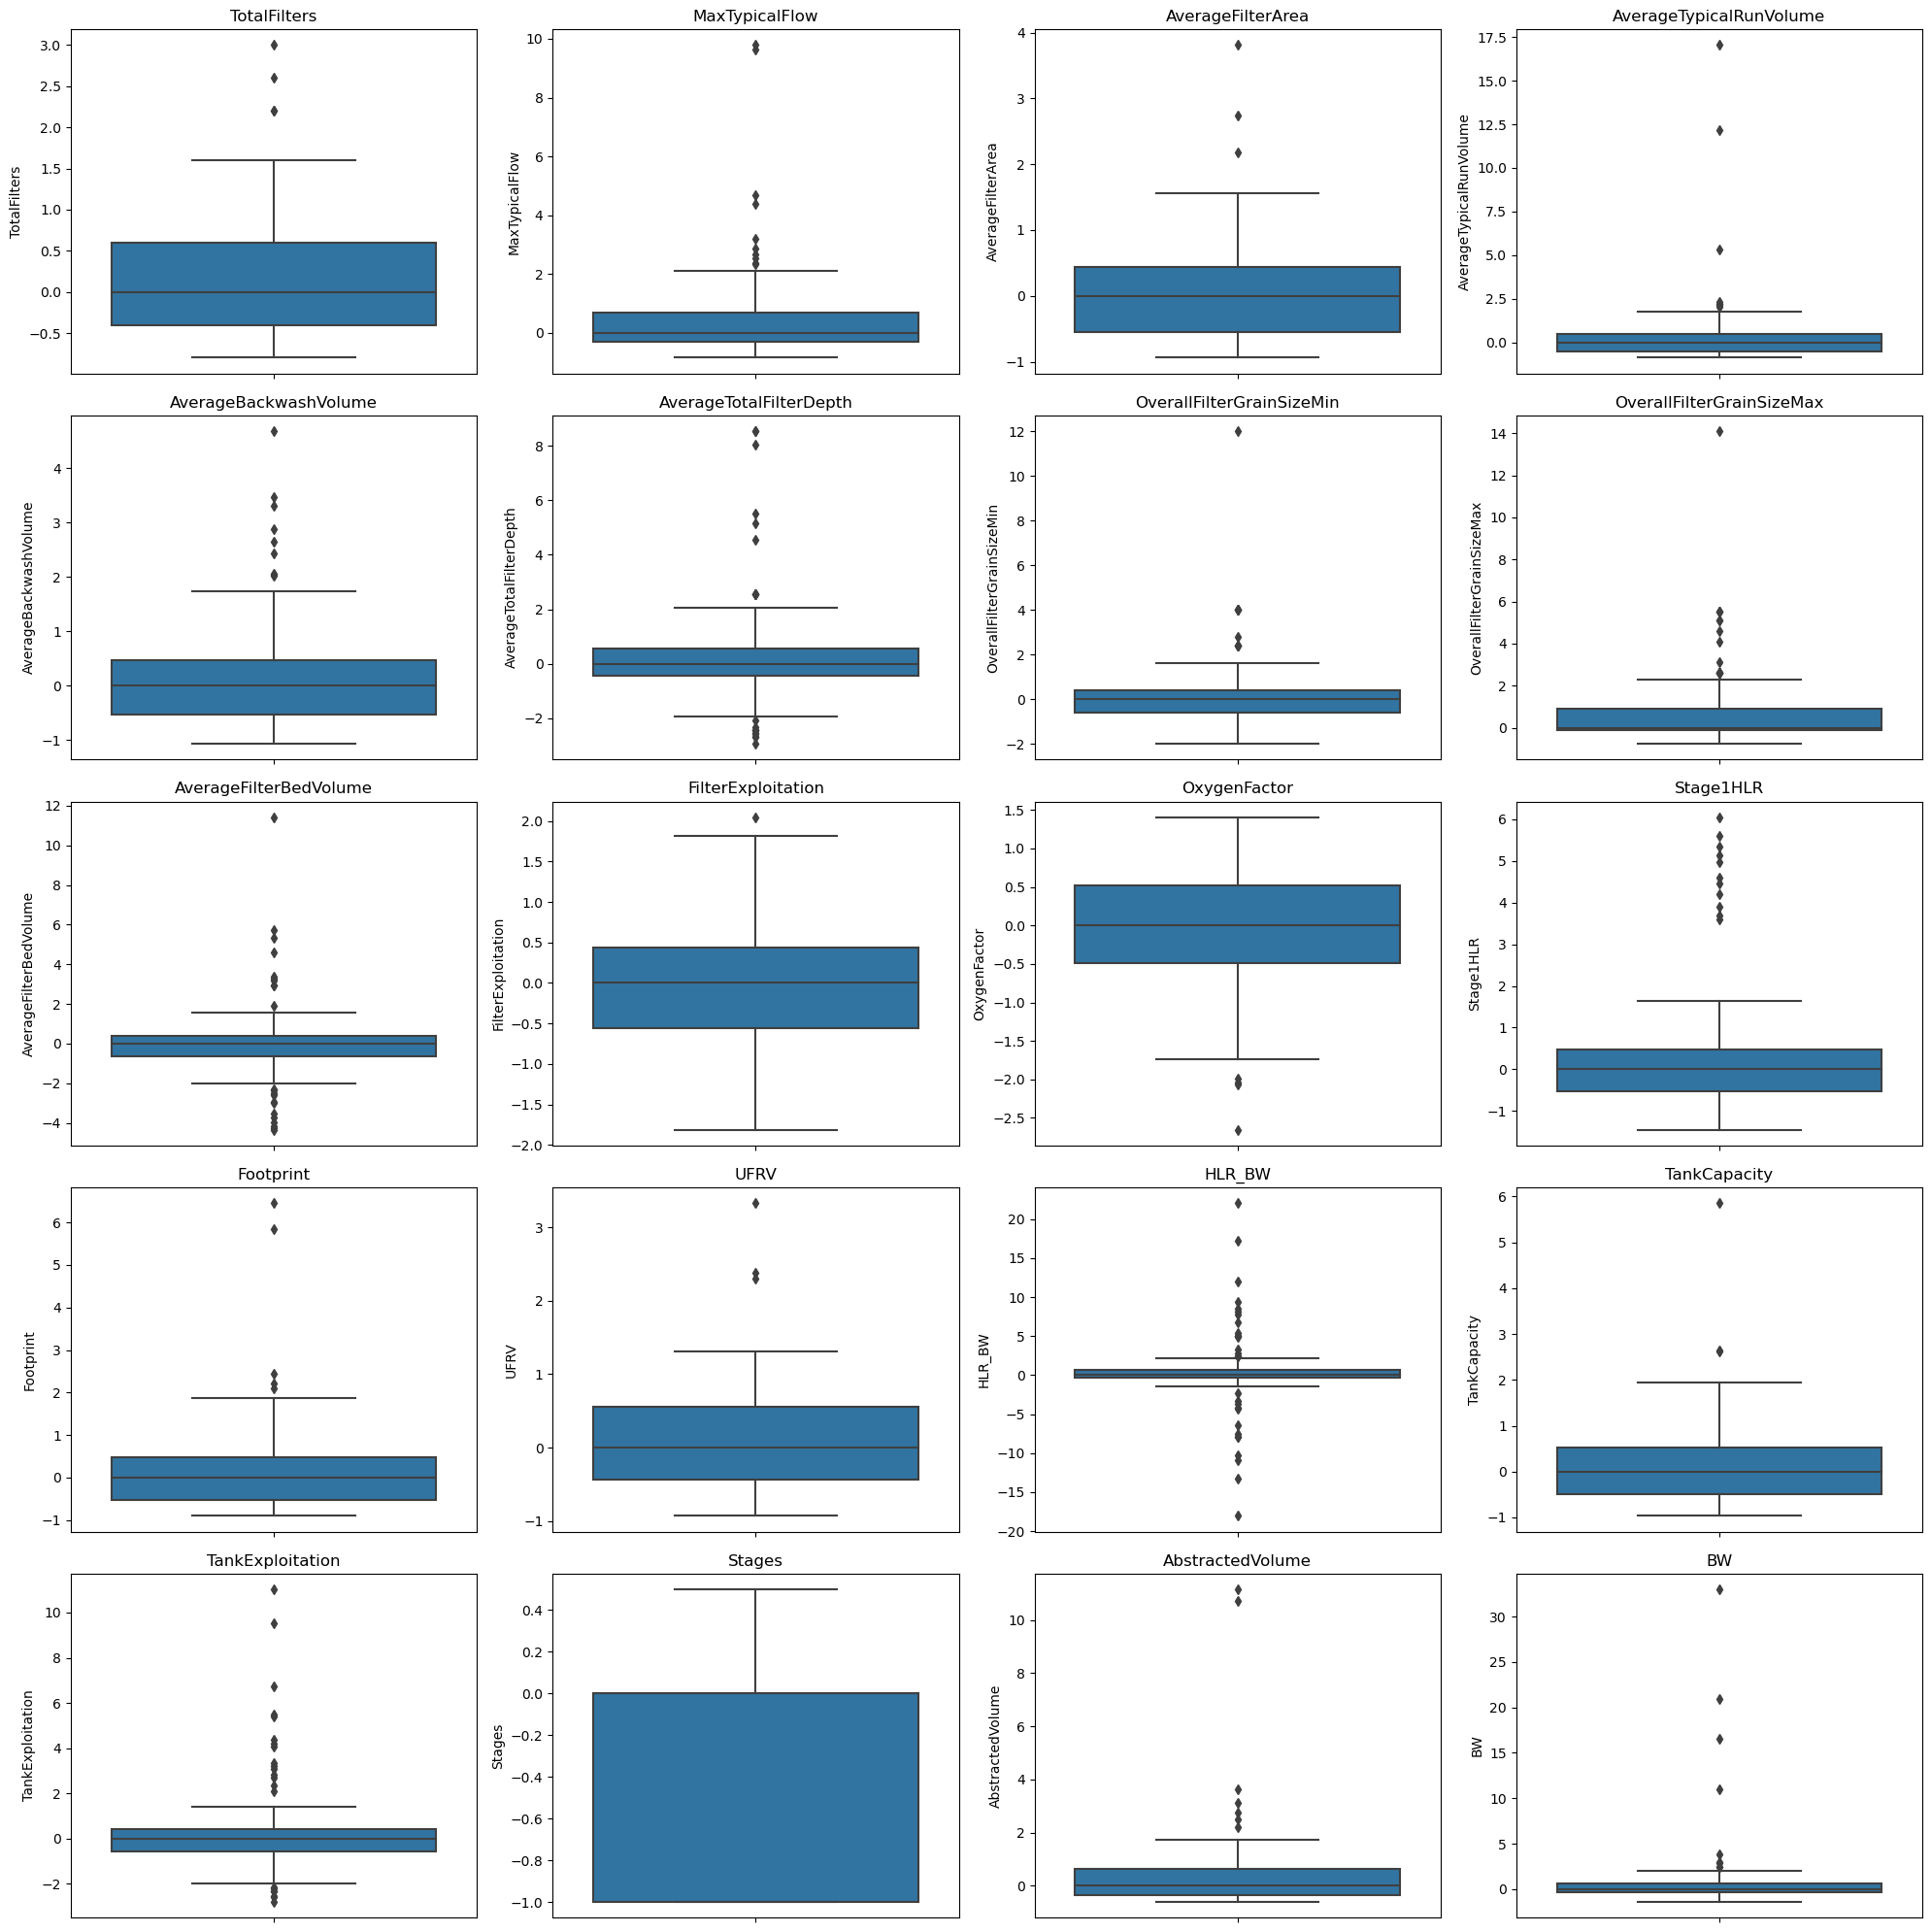

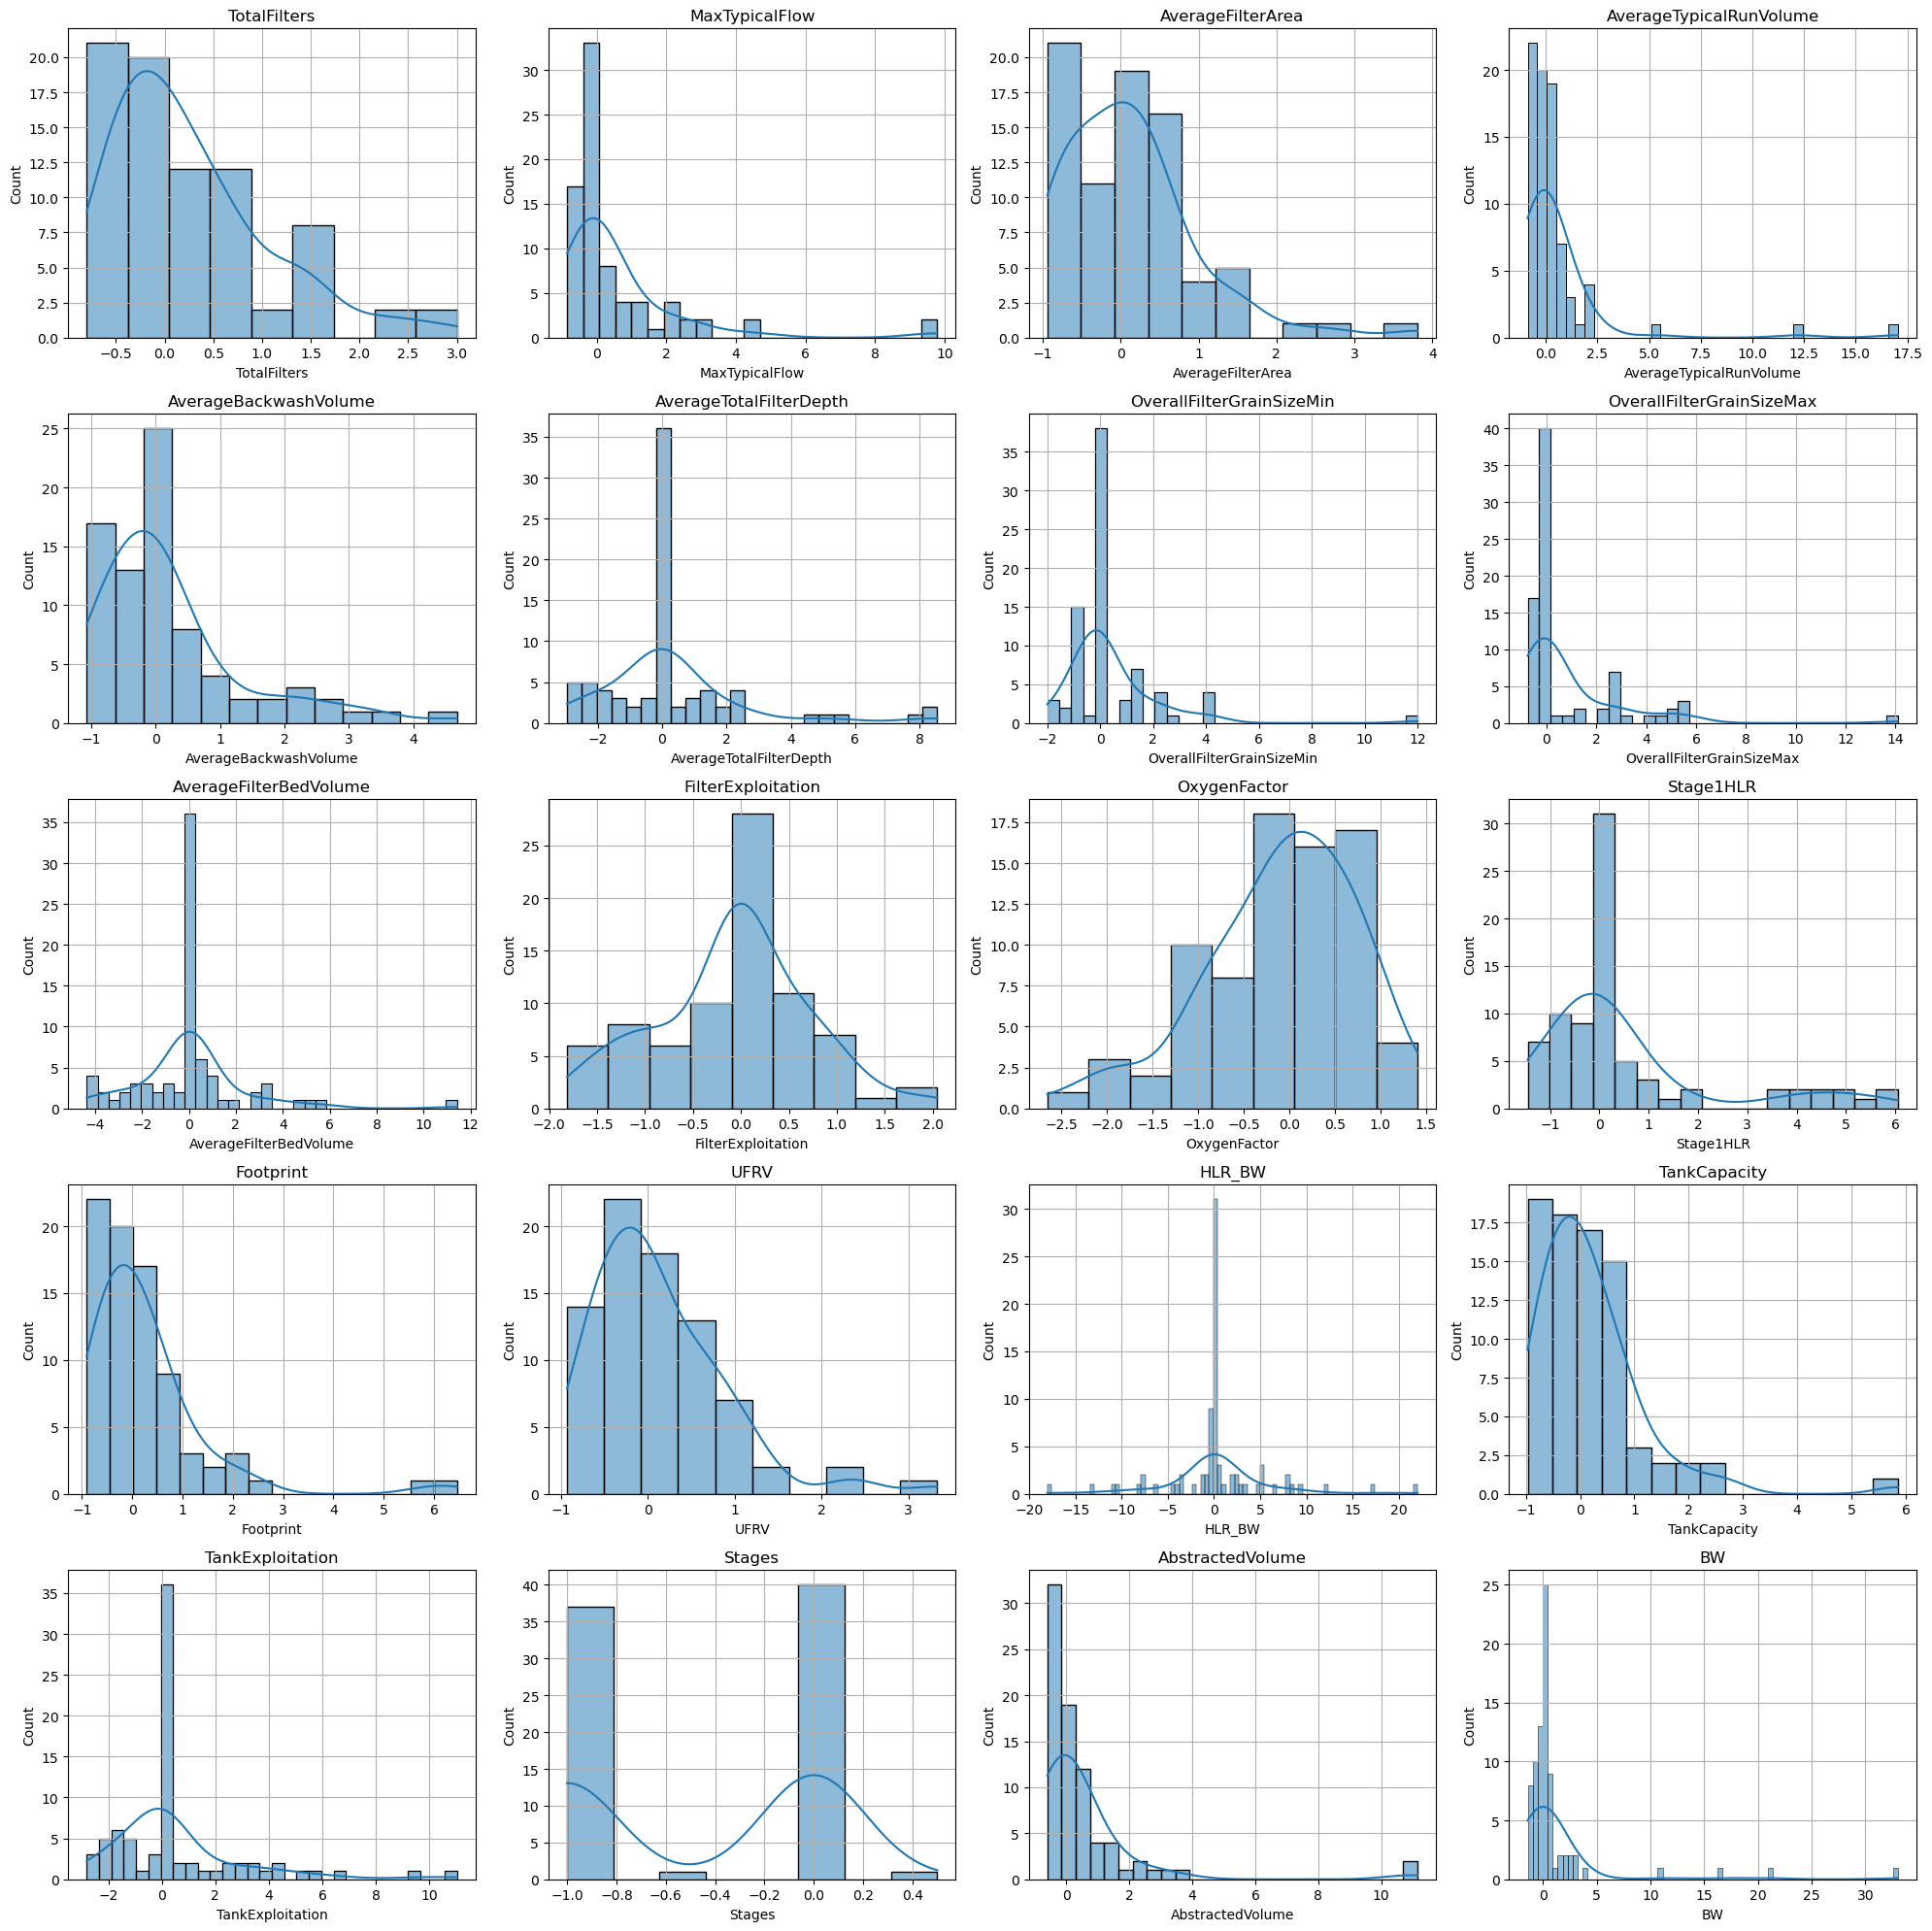

In [311]:
box_plots(robust_scaled_data, robust_scaled_data.columns)
hist_plots(robust_scaled_data, robust_scaled_data.columns)

# Handling columns with outliers

Even after scaling the data, there are some columns that have large outliers, we're going to remove these columns

In [321]:
columns_to_remove = ['AverageTotalFilterDepth', 'OverallFilterGrainSizeMin', 'OverallFilterGrainSizeMax', 'AverageFilterBedVolume', 'Stage1HLR', 'HLR_BW', 'TankExploitation', 'BW']

standardized_data.drop(columns=columns_to_remove, inplace=True)

In [322]:
df = pd.concat([standardized_data, boolean_data])
display(df)

,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,FilterExploitation,OxygenFactor,Footprint,UFRV,TankCapacity,...,PrimaryTrigger_Waterlevel above filter,GravityPressureMixed_Mixed,GravityPressureMixed_Pressure,AerationType_Bottom aeration,AerationType_Cascade,AerationType_Inka,AerationType_No primary aeration,AerationType_Other,AerationType_Passive plate aerator,AerationType_Pure oxygen injection
0,-0.062970,-0.599875,-0.668872,0.017047,-0.856009,-0.146349,-0.095208,0.915592,2.860992,0.657930,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.560431,-0.357647,-0.798214,-0.543145,-0.315948,0.122413,-1.127717,-0.835111,-1.380650,-1.128408,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.560431,-0.317275,0.438614,-0.143008,1.343239,0.188561,1.228522,-0.448276,-0.310001,0.262691,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-1.057891,-0.317275,0.516378,-0.440252,-0.375955,0.110871,0.672555,1.624115,-1.204722,-0.407315,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-1.057891,-0.317275,-1.202827,-0.548861,-1.021027,0.110871,-2.345548,4.634135,-0.731092,2.459232,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
